In [367]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Exercise 1
Thomas Lordick
s0thlord@uni-bonn.de

a)

In [368]:
df = pd.read_excel("Downloads/breast-cancer-wisconsin.xlsx") #read the data set
df=df.interpolate(method='nearest') #interpolate missing values
df=df.drop("code", axis=1)
df.head()

,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [391]:
pearson_matrix=df.corr(method='pearson') #correlation dataframe
print (pearson_matrix)
pearson_npmatrix=pearson_matrix.as_matrix() #coverted to numpy matrix
result = np.where(pearson_npmatrix<0.6, 0, pearson_npmatrix) #filtering according to threshold
result=result*0.001 # a little scaling
print (result)

             thickness   uniCelS  uniCelShape    marAdh  epiCelSize   bareNuc  \
thickness     1.000000  0.644913     0.654589  0.486356    0.521816  0.583571   
uniCelS       0.644913  1.000000     0.906882  0.705582    0.751799  0.681309   
uniCelShape   0.654589  0.906882     1.000000  0.683079    0.719668  0.701137   
marAdh        0.486356  0.705582     0.683079  1.000000    0.599599  0.663669   
epiCelSize    0.521816  0.751799     0.719668  0.599599    1.000000  0.579340   
bareNuc       0.583571  0.681309     0.701137  0.663669    0.579340  1.000000   
blaChroma     0.558428  0.755721     0.735948  0.666715    0.616102  0.671398   
normNuc       0.535835  0.722865     0.719446  0.603352    0.628881  0.571895   
mitoses       0.350034  0.458693     0.438911  0.417633    0.479101  0.337078   
class         0.716001  0.817904     0.818934  0.696800    0.682785  0.807394   

             blaChroma   normNuc   mitoses     class  
thickness     0.558428  0.535835  0.350034  0.716001 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


b) and c)

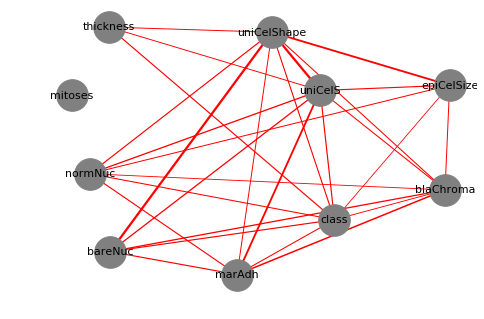

In [387]:
Graph = nx.from_numpy_matrix(result)

widths=[]    #dynamic scaling of the edge widths
for i in result:
    for j in i:
        if j > 0:
            widths.append((j*1500)**2)

columns=list(df)
nodes=[i for i in range(10)]
mapping={nodes[i]:columns[i] for i in range(10)}
H=nx.relabel_nodes(Graph,mapping) #naming of the nodes
nx.draw_spring(H,with_labels=True,node_color='grey',width=widths, node_size=1000, edge_color='red',font_size=11) #draw the actual graph

In [385]:
# preparation for task d). Creating a dictionary of the matrix and cutting out self-correlations.
pearson_dict=pearson_matrix.to_dict()
pearson_dict_mod={}
for keys in pearson_dic.keys():
    pearson_dict_mod[keys]={}
    for inner_keys in pearson_dic[keys].keys():
        if pearson_dic[keys][inner_keys]!=1.0:
            pearson_dict_mod[keys][inner_keys]=pearson_dic[keys][inner_keys]

d)

['purple', 'red', 'red', 'purple', 'purple', 'orange', 'purple', 'purple', 'grey', 'orange']


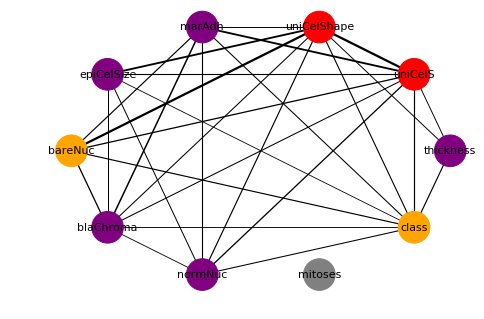

In [389]:
Graph_2 = nx.from_numpy_matrix(result)

columns=list(df)
nodes=[i for i in range(10)]
mapping={nodes[i]:columns[i] for i in range(10)}

K=nx.relabel_nodes(Graph_2,mapping) 

color_map = []
for node in K.nodes:  #dynamic coloring of the nodes based on correlation values!
    if any(x for x in list(pearson_dict_mod[node].values()) if x > 0.9):
        color_map.append('red')
    elif max(list(pearson_dict_mod[node].values()))<=0.9 and max(list(pearson_dict_mod[node].values()))>0.8:
        color_map.append('orange')
    elif max(list(pearson_dict_mod[node].values()))<=0.8 and max(list(pearson_dict_mod[node].values()))>0.6:
        color_map.append('purple')
    else:
        color_map.append("grey")         
nx.draw_circular(K,width=widths,node_color = color_map,with_labels = True,node_size=1000, edge_color='black',font_size=11)

e)

a) Since I removed the attribute "Code" from the dataset (because it's no real attribute), the only disconnected
attribute appears to be "Mitoses". This indicates, that there's no signifcant (defined by our threshold) correlation to other attributes at all. In other words: The ability of a cell to divide appears to be not related to other properties like e.g whether it's malignant or benign.

b) This is called indirect correlation. An indirect relationship is a relationship between two variables which affect each other. ... For example, uniCelS affects UnicelShape, which affects Variable bareNuc strongly. Variables uniCelS and bareNuc have an indirect relationship (beside a direct in our case!) through Variable UnicelShape. The two variables in an indirect relationship often move in opposite directions (QUOTED)

c)
Based on the graph and the correlation matrix , I'd go for BareNuc, uniCelShape and uniCelS. There's also a strong correlation between the attributes themselves and all of them contribute to the class attribute. 

In [1]:
################

Exercise 4
Thomas Lordick
s0thlord@uni-bonn.de

a)
Two common expressive channels for ordered attributes of my choice would be Size (2D) and color saturation. I'd rank size before color saturation, because differences in size are more intuitive for humans than differences in saturation.
A common channel for categorical attributes would be the shape of marks or color hue.

b)
Mark: Line
Channels: Position, Length, Color Hue
To better capture differences in the amount of fiction only, I'd just cut out the variable that measures the amount of non-fiction per person. That would completely lead to the removal of the channel of color hue (only red lines then) which usually distiguishes between fiction and non-fiction measurements. 

In [2]:
##############